# 5. Deep Learning for Computer Vision
---

## 5.2 Training a ConvNet from Scratch on a Small Dataset 
---

### Listing 5.4 Copying images to training, validation, and test directories
---

* [The Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats) (kaggle)
   * 12,500 images of dogs
   * 12,500 images of cats

In [1]:
import os, shutil

%load_ext version_information
%version_information

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
Fri Nov 02 03:39:26 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [2]:
# Original dataset path
original_dataset_dir = 'D:/utils/jin_utils/data/dataset/dogs_vs_cats/train/'

# Smaller dataset path
base_dir = 'data/dogs_vs_cats_small/'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.makedirs(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.makedirs(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.makedirs(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.makedirs(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.makedirs(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.makedirs(test_dogs_dir)

# Copy cat data
# First 1,000 for train
filenames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for filename in filenames:
    src = os.path.join(original_dataset_dir, filename)
    dst = os.path.join(train_cats_dir, filename)
    shutil.copyfile(src, dst)

# Next 500 for validation
filenames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for filename in filenames:
    src = os.path.join(original_dataset_dir, filename)
    dst = os.path.join(validation_cats_dir, filename)
    shutil.copyfile(src, dst)

# Next 500 for test
filenames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for filename in filenames:
    src = os.path.join(original_dataset_dir, filename)
    dst = os.path.join(test_cats_dir, filename)
    shutil.copyfile(src, dst)
    
# Copy dog data
# First 1,000 for train
filenames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for filename in filenames:
    src = os.path.join(original_dataset_dir, filename)
    dst = os.path.join(train_dogs_dir, filename)
    shutil.copyfile(src, dst)

# Next 500 for validation
filenames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for filename in filenames:
    src = os.path.join(original_dataset_dir, filename)
    dst = os.path.join(validation_dogs_dir, filename)
    shutil.copyfile(src, dst)

# Next 500 for test
filenames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for filename in filenames:
    src = os.path.join(original_dataset_dir, filename)
    dst = os.path.join(test_dogs_dir, filename)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Listing 5.5 Instantiating a small convnet for dogs vs. cats classification
---

In [4]:
from keras import layers
from keras import models

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.3.0
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 01 18:08:10 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Listing 5.6 Configuring the model for training
---

In [6]:
from keras import optimizers

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.3.0
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 01 18:08:10 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

### Listing 5.7 Using ImageDataGenerator to read images from directories
---

Keras has utilities to take care of preprocessing steps automatically. Keras has a module with **image-processing helper tools**, located at **keras.preprocessing.image**. In particular, it contains the class **ImageDataGenerator**, which lets you quickly set up **Python generators** that can **automatically turn image files on disk into batches of preprocessed tensors**.

In [64]:
from keras.preprocessing.image import ImageDataGenerator

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.3.0
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 01 20:52:31 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [65]:
"""
Generate batches of tensor image data with real-time data augmentation.
The data will be looped over (in batches).
"""
train_datagen = ImageDataGenerator(rescale=1./255)    # Rescale the pixel values: [0, 255] → [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

print(train_dir)
"""
Takes the path to a directory & generates batches of augmented data.
"""
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),    # Resize
                                                    batch_size=20,
                                                    class_mode='binary')    # Binary classfication (binary crossentropy, binary labels)
print(validation_dir)
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

data/dogs_vs_cats_small/train
Found 2000 images belonging to 2 classes.
data/dogs_vs_cats_small/validation
Found 1000 images belonging to 2 classes.


In [67]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [66]:
type(train_generator)

keras_preprocessing.image.DirectoryIterator

In [69]:
dir(train_generator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_set_index_array',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'common_init',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'seed',
 'shuffle',
 'split',
 'subset',
 'target_size',
 'total_batches_seen']

**It yields batches of images and labels.** Note that the generator yields these batches **indefinitely**: it loops endlessly over the images in the target folder.

In [70]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### Understanding Python generators
---

A Python **generator** is an object that acts **as an iterator**: it’s an object you can use with the for … in operator. Generators are built using the `yield` operator.
   * [Iterator and generator types](https://docs.python.org/3/library/stdtypes.html?highlight=generator#iterator-types)
   * [Yield expressions](https://docs.python.org/3/reference/expressions.html#yield-expressions)
   * [What is the difference between yield and return in python?](https://www.quora.com/What-is-the-difference-between-yield-and-return-in-python)


Here is an example of a generator that yields integers:

In [8]:
def generator():
    i = 0
    while True:
        i += 1
        yield i

for item in generator():
    print(item)
    
    if item > 4:
        break

1
2
3
4
5


In [57]:
type(generator)

function

`gen` is a generator.

In [83]:
gen = generator()

type(gen)

generator

`gen` has `__next__` method.

In [84]:
dir(gen)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [85]:
"""
Return the next item from the iterator. If default is given and the iterator
is exhausted, it is returned instead of raising StopIteration.
"""
next(gen)
# gen.__next__()

1

In [86]:
next(gen)

2

In [87]:
next(gen)

3

In [88]:
for x in range(7):
    print(next(gen))

4
5
6
7
8
9
10


### Listing 5.8 Fitting the model using a batch generator
---

In [89]:
# fit_generator expects as its first argument a Python generator
history = model.fit_generator(train_generator,    # It yield batches of inputs and targets indefinitely.
                              steps_per_epoch=100,    # 20 × 100 = 2,000
                              epochs=30,
                              validation_data=validation_generator,   # It could be a generator or a tuple of Numpy arrays.
                              validation_steps=50)    # 20 × 50 = 1,000

Epoch 1/30
100/100 [==============================] - 62s 620ms/step - loss: 0.6936 - acc: 0.5325 - val_loss: 0.6991 - val_acc: 0.5140
Epoch 2/30
100/100 [==============================] - 62s 618ms/step - loss: 0.6539 - acc: 0.6225 - val_loss: 0.6367 - val_acc: 0.6480
Epoch 3/30
100/100 [==============================] - 62s 620ms/step - loss: 0.6076 - acc: 0.6785 - val_loss: 0.6145 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 62s 623ms/step - loss: 0.5665 - acc: 0.7155 - val_loss: 0.5989 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 62s 621ms/step - loss: 0.5334 - acc: 0.7320 - val_loss: 0.5993 - val_acc: 0.6650
Epoch 6/30
100/100 [==============================] - 62s 622ms/step - loss: 0.5065 - acc: 0.7550 - val_loss: 0.5828 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 62s 617ms/step - loss: 0.4717 - acc: 0.7760 - val_loss: 0.5872 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 6

### Listing 5.9 Saving the model
---

In [90]:
model.save('models/5.2_dogs_vs_cats_small_cnn.h5')

In [92]:
model.save_weights('models/5.2_dogs_vs_cats_small_cnn_weights.h5')
# model.load_weights('models/5.2_dogs_vs_cats_small_cnn_weights.h5')

### Listing 5.10 Displaying curves of loss and accuracy during training
---

In [102]:
type(history)

keras.callbacks.History

In [103]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [105]:
type(history.history)

dict

In [106]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

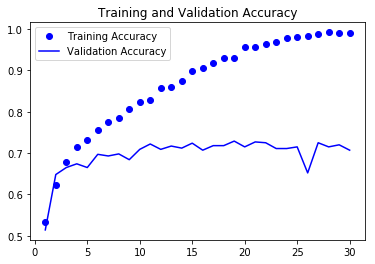

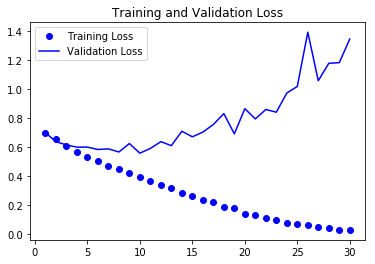

In [107]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy curves
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss curves
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting.